# **1. Objective :**

### **> 카테고리를 활용한 월별 과목 선호도 변화 추이 분석 및 추천 시스템 구현**
  * 카테고리와 서브 카테고리를 활용하여, 2021년도 3~9월 간 고객이 선호하는 과목이 어떻게 변화했는지 상세 분석하였습니다.
  * 또한, 단순 분석에 그치는 것이 아니라 상세 분석된 데이터를 활용한 추천 시스템을 구현하였습니다.

# **2. Data Preprocessing :**

**1. 결제 금액이 발생한 실 구매 완료 건으로 데이터 한정**
  * state = 'COMPLETED' & type = 'PAYMENT' 조건 sorting
  * transaction_amount가 '0원'인 건 제거

**2. B2B 및 개발자 테스트용 외, 개인 구매 강의 건으로 데이터 한정**
  * course_title & format 내에 'B2B' string 포함 건 제거
  * course_title 내에 'TEST|test' string 포함 건 제거

**3. 기간 한정으로 일시적으로 판매되는 강의 건 제외**
  * course_title 내에 '한정판매' string 포함 건 제거
  * course_title 내에 '프로모션' string 포함 건 제거

**4. 최종 항목 내 결측치 제외**
  * subcategory_title 내에 NaN 건 제거

**5. 기타 전처리 사항**
  * 데이터 일반화를 위해, format 내에 '올인원' 조건 sorting


# **3. Step by Step Process in EDA :**

**1. 월별 전체 카테고리 분석**
  * 3-9월 데이터를 활용한 시각화 진행
  * 4-8월 데이터를 활용한 시각화 진행

**2. 디자인 카테고리 분석**
  * 상승 추세인 디자인 카테고리에 대해, 상위 5개 항목 시각화 진행

**3. 추천시스템 구현**
  * 강의 구매 이력을 기반으로 진행
  * 코사인 유사도를 활용한 카테고리/서브 카테고리 추천 시스템 완성

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
# row 제한 없애기
# pd.set_option('display.max_rows', None)

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/이어드림 데이터분석프로젝트 0509/pp2_FC.csv', index_col = 0)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
sns.set(font_scale = 1.3)

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# font_location = './NanumGothic.ttf'  #font 경로 설정
# font_name = fm.FontProperties(fname=font_location).get_name()
# plt.rc('font', family=font_name)
plt.rc('font', family='NanumBarunGothic') 

# 월별로 카테고리 결제 건수를 분석해보자

In [ ]:
df['completed_at'] = pd.to_datetime(df['completed_at'])

# 3월 데이터
target_month = 3
df3 = df.query('completed_at.dt.month == @target_month')
df3.shape

# 4월 데이터
target_month = 4
df4 = df.query('completed_at.dt.month == @target_month')
df4.shape

# 5월 데이터
target_month = 5
df5 = df.query('completed_at.dt.month == @target_month')
df5.shape

# 6월 데이터
target_month = 6
df6 = df.query('completed_at.dt.month == @target_month')
df6.shape

# 7월 데이터
target_month = 7
df7 = df.query('completed_at.dt.month == @target_month')
df7.shape

# 8월 데이터
target_month = 8
df8 = df.query('completed_at.dt.month == @target_month')
df8.shape

# 9월 데이터
target_month = 9
df9 = df.query('completed_at.dt.month == @target_month')
df9.shape

(2060, 18)

In [ ]:
# 월 별 상위 10개의 카테고리의 DataFrame 생성
A = df3.groupby('category_title').size().sort_values(ascending = False)[:10]
A = pd.DataFrame(A)

B = df4.groupby('category_title').size().sort_values(ascending = False)[:10]
B = pd.DataFrame(B)

C = df5.groupby('category_title').size().sort_values(ascending = False)[:10]
C = pd.DataFrame(C)

D = df6.groupby('category_title').size().sort_values(ascending = False)[:10]
D = pd.DataFrame(D)

E = df7.groupby('category_title').size().sort_values(ascending = False)[:10]
E = pd.DataFrame(E)

F = df8.groupby('category_title').size().sort_values(ascending = False)[:10]
F = pd.DataFrame(F)

G = df9.groupby('category_title').size().sort_values(ascending = False)[:10]
G = pd.DataFrame(G)

In [ ]:
A.columns = ['3']
B.columns = ['4']
C.columns = ['5']
D.columns = ['6']
E.columns = ['7']
F.columns = ['8']
G.columns = ['9']

In [ ]:
# concat 하여 하나의 데이터 프레임으로 생성
H = pd.concat([A ,B, C, D , E ,F ,G], axis = 1)

In [ ]:
H

,3,4,5,6,7,8,9
category_title,,,,,,,
프로그래밍,173,804,671,837,669,674,543
데이터사이언스,156,515,351,473,505,395,269
디자인,144,415,409,578,480,689,439
업무 생산성,105,350,292,292,260,313,183
마케팅,101,555,505,424,309,327,128
부동산/금융,87,354,360,382,321,389,209
영상/3D,75,353,207,455,249,242,100
투자/재테크,14,76,74,132,317,481,189


In [ ]:
# 시각화를 위해 전치 활용
H = H.T

# 3월부터 9 월까지 데이터로 시각화 한 경우 다음과 같다.

| 하지만 3월 데이터는 너무 부족하고, 9월 결제 건수는 전체적으로 하락하였으니 제외하고 4월부터 8월까지로 다시 시각화 하면

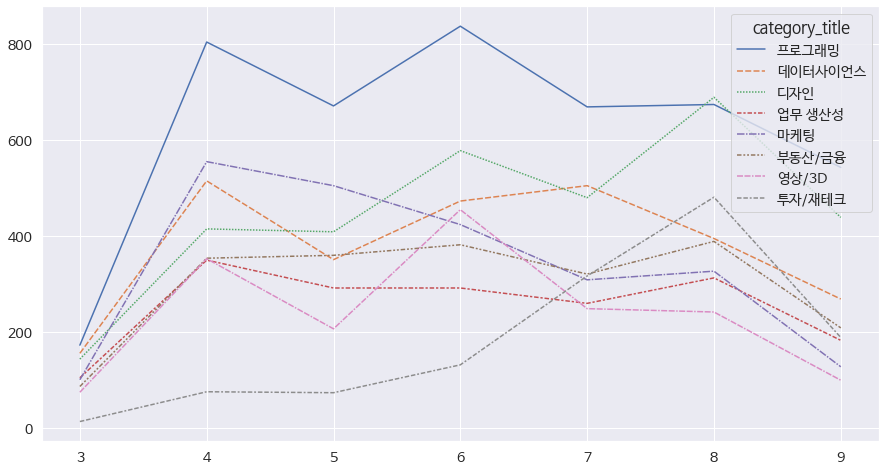

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data = H)

In [ ]:
I = pd.concat([B, C, D , E ,F], axis = 1)

In [ ]:
I = I.T

# 4월 부터 8월까지 시각화한 결과는 다음과 같다.

- 프로그래밍 카테고리가 꾸준히 제일 많이 팔렸습니다.
- 8월에 디자인 카테고리가 프로그래밍을 근소하게 제쳤습니다.
- 디자인 카테고리의 수요는 증가하는 추세입니다.
- 투자/재테크의 증가 폭이 제일 컸다.
- 마케팅 카테고리의 수요는 점점 감소하였다.

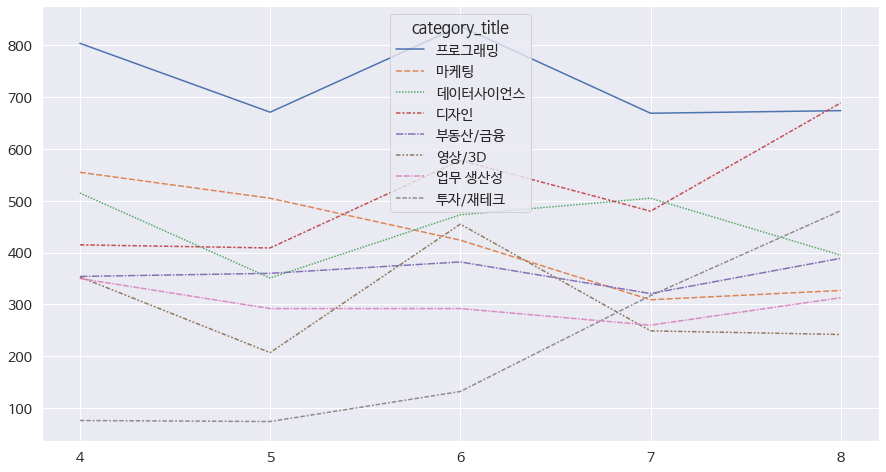

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data = I)

# 디자인 카테고리 분석

In [ ]:
design = df[df.category_title == '디자인']

In [ ]:
design['month'] = pd.to_datetime(design['completed_at']).dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Top5 = design.course_title.value_counts().sort_values(ascending=False)

In [ ]:
Top5 = pd.DataFrame(Top5)

In [ ]:
Top5 = Top5[:5]

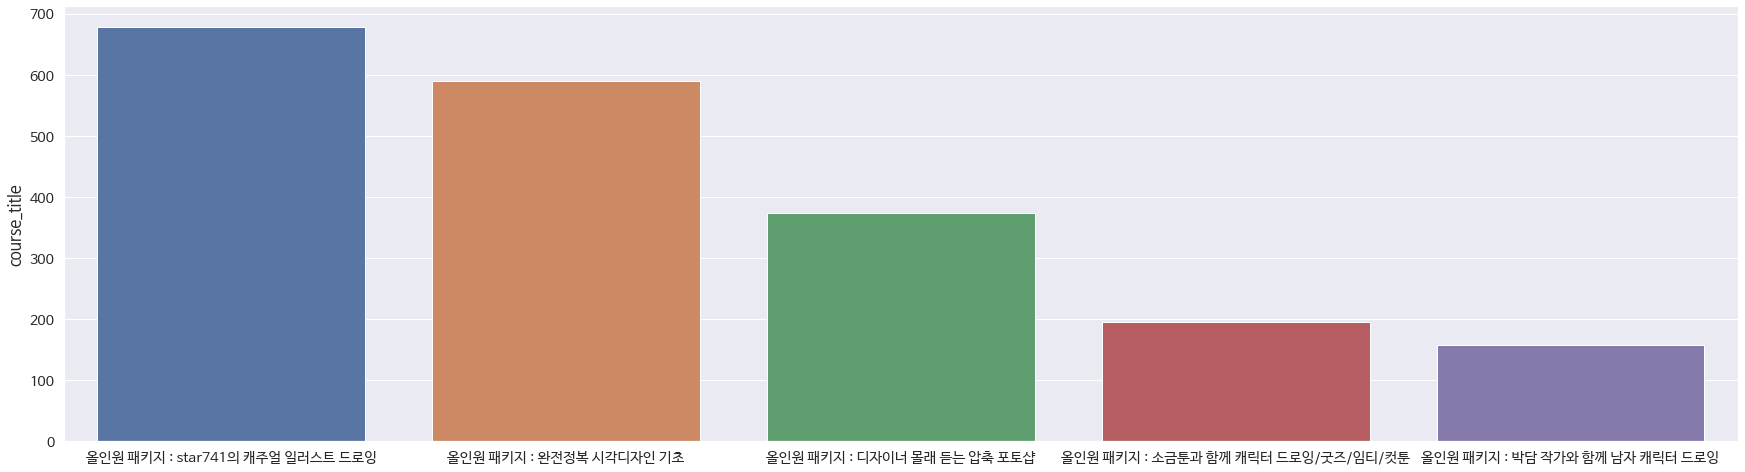

In [ ]:
plt.figure(figsize = (30, 8))
sns.barplot(x=Top5.index, y=Top5.course_title)
plt.show()

In [ ]:
design[design.month == 4].course_title.value_counts().sort_values(ascending=False)[:3]

올인원 패키지 : 완전정복 시각디자인 기초               125
올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵            74
올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰     54
Name: course_title, dtype: int64

In [ ]:
design[design.month == 5].course_title.value_counts().sort_values(ascending=False)[:3]

올인원 패키지 : 완전정복 시각디자인 기초            132
올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵         69
올인원 패키지 : star741의 캐주얼 일러스트 드로잉     54
Name: course_title, dtype: int64

In [ ]:
design[design.month == 6].course_title.value_counts().sort_values(ascending=False)[:3]

올인원 패키지 : star741의 캐주얼 일러스트 드로잉                                          221
올인원 패키지 : 구글 Material Design 시스템을 활용한 Youtube for Learning 앱 디자인 프로젝트     88
올인원 패키지 : 완전정복 시각디자인 기초                                                   74
Name: course_title, dtype: int64

In [ ]:
design[design.month == 7].course_title.value_counts().sort_values(ascending=False)[:3]

올인원 패키지 : star741의 캐주얼 일러스트 드로잉    176
올인원 패키지 : 완전정복 시각디자인 기초             64
올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵         54
Name: course_title, dtype: int64

In [ ]:
design[design.month == 8].course_title.value_counts().sort_values(ascending=False)[:3]

올인원 패키지 : star741의 캐주얼 일러스트 드로잉    142
올인원 패키지 : 완전정복 시각디자인 기초            104
올인원 패키지 : 박담 작가와 함께 남자 캐릭터 드로잉      92
Name: course_title, dtype: int64

In [ ]:
design[design.course_title == '올인원 패키지 : star741의 캐주얼 일러스트 드로잉'].marketing_start_at[:1]

6352    2021-05-25 00:00:00
Name: marketing_start_at, dtype: object

In [ ]:
design.subcategory_title.value_counts()

일러스트     1165
시각디자인     889
UX/UI     618
디자인툴      482
Name: subcategory_title, dtype: int64

In [ ]:
d1 = pd.DataFrame(design.groupby(['month','subcategory_title'])['subcategory_title'].count().unstack(level=1))

In [ ]:
d1 = d1[~((d1.index == 3)|(d1.index==9))]

In [ ]:
d1.reset_index(inplace=True)

In [ ]:
d1 = d1.melt('month', var_name='subcategory', value_name='vals')

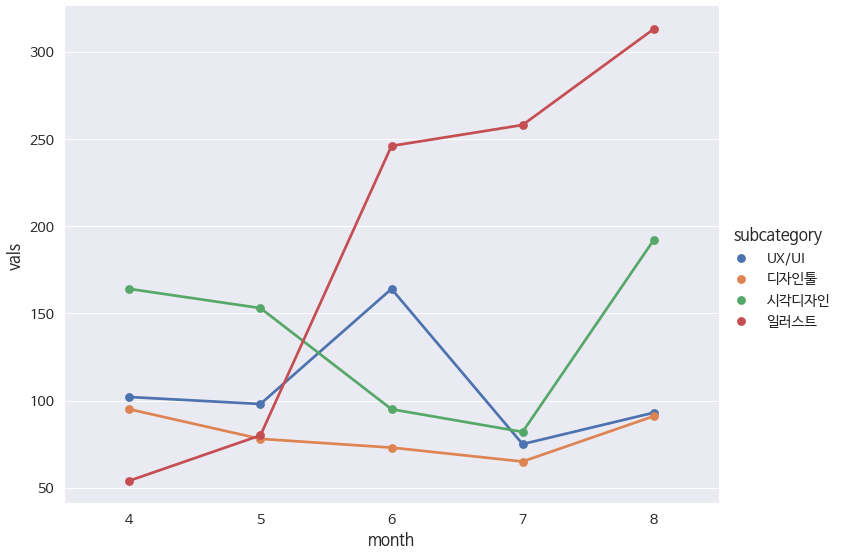

In [ ]:
sns.catplot(x='month', y='vals', hue='subcategory', data=d1, kind='point', height = 8, aspect = 1.3)

- 4월, 5월 일러스트 강의는 수요가 낮았음
- 5월 개강한 유명 일러스트레이터 강의의 수요가 증가하여 6월이후 월별 디자인 카테고리 1위를 차지 및 전체 1위 차지
- 6월부터 꾸준히 증가하여 8월 프로그래밍의 수요를 제침
- 유명 일러스트레이터 강의를 통해 꾸준한 수요를 유지할 수 있을것으로 예상

# 추천시스템 구현
* <font size=4>개요</font>
    * <font size=4> 유저의 구매 데이터를 바탕으로 코사인 유사도 기반 추천시스템 구현</font>
* <font size=4>방법론</font>
    * <font size=4>추천시스템의 대표적인 방법론 중 아이템기반 협업필터링 아이디어를 착안하였습니다.</font>
    * <font size=4>구매 이력을 강의 벡터의 점수로 판단하고 벡터를 만들었습니다.</font>

# 코사인 유사도

* <font size=4>정의</font>
    * <font size=4>내적공간의 두 벡터간 각도의 코사인값을 이용하여 측정된 벡터간의 유사한 정도</font>
    <br/>
    <br/>
    <br/>
    <br/>

$$ \cos\theta = \dfrac{x \cdot y}{|x| |y|}$$</font>

<br/>
<br/>
<font>$$
\text{cosine_sim}(i, j) = \frac{
\sum\limits_{u \in U_{ij}} r(u,i) \cdot r(u,j)}
{\sqrt{\sum\limits_{u \in U_{ij}} r(u,i)^2} \cdot
\sqrt{\sum\limits_{u \in U_{ij}} r(u,j)^2}
} 
$$</font>
<br/>
<br/>
<br/>

* <font size=4>용어 설명</font>
    * <font size=4>u(user): 패스트캠퍼스 강좌 구매자</font>
    * <font size=4>i,j: 패스트캠퍼스 강의</font>
    * <font size=4>i,j 사이 유사도를 비교하여 가장 높은 유사도 item(강의)을 추천하게됩니다.</font>



# 강의 추천시스템

In [ ]:
# float을 int로 type 변경
df['customer_id'] = df['customer_id'].astype(int)

item = df.course_title.unique()
user = df.customer_id.unique()
user_rating = pd.DataFrame(index=user, columns=item)
user_rating.fillna(0, inplace = True)
item_rating = pd.DataFrame(index=item, columns=user)
item_rating.fillna(0, inplace = True)

* <font size=4>유저와 아이템을 가지고 item 기반 데이터프레임 만들기</font>

In [ ]:
for row in df.itertuples():
    item_rating.loc[row.course_title, row.customer_id] +=1

* <font size=4>row: 강의, column: 유저로 하는 백터 만듭니다.</font>
* <font size=4>원본 데이터프레임을 행단위로 출력하며 새로운 데이터프레임에 유저가 강의를 들었으면 +1 해줍니다.</font>

In [ ]:
item_rating

,478028,471759,478051,140846,474451,478101,80434,474806,453024,478189,...,670709,515805,670735,670747,670748,503113,670463,670787,578540,670833
올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
올인원 패키지 : 마디아의 UX/UI 포트폴리오,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
올인원 패키지 : 100억을 움직이는 단 10장의 PPT,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
올인원 패키지 : 디지털 마케팅 MAX 2020,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
올인원 패키지 : 리마의 로맨스판타지 웹소설 일러스트,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
올인원 패키지 : 노잼봇과 함께 배우는 파이썬 유치원,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* <font size=4>총 116개 강의, 16377명 유저가 존재</font>
* <font size=4>즉, 116개 벡터와 각 벡터의 16377개 성분이 존재</font>

# 코사인유사도 계산

In [ ]:
item_based_collabor = cosine_similarity(item_rating)
item_based_collabor

array([[1.        , 0.        , 0.01834384, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.00416916, ..., 0.        , 0.        ,
        0.01320139],
       [0.01834384, 0.00416916, 1.        , ..., 0.        , 0.00935356,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.01601282,
        0.01422776],
       [0.        , 0.        , 0.00935356, ..., 0.01601282, 1.        ,
        0.02961744],
       [0.        , 0.01320139, 0.        , ..., 0.01422776, 0.02961744,
        1.        ]])

* <font size=4>116개 강의에 각각의 코사인 유사도를 계산하기</font>

# Shape 확인

In [ ]:
print(item_based_collabor.shape)

(116, 116)


* <font size=4>116개 각 벡터간의 코사인 유사도 측정을 통해 116,116 행렬을 가집니다.</font>

In [ ]:
item_based_collabor = pd.DataFrame(data=item_based_collabor, index =item_rating.index, columns = item_rating.index )
item_based_collabor

,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,올인원 패키지 : 마디아의 UX/UI 포트폴리오,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문,올인원 패키지 : 디지털 마케팅 MAX 2020,올인원 패키지 : Android 앱 개발,올인원 패키지 : 인스타를 성장시킨 50명의 성공방정식,올인원 패키지 : C++ 실력완성,올인원 패키지 : 부동산 디벨로퍼,올인원 패키지 : 완전정복 시각디자인 기초,...,올인원 패키지 : SNS 콘텐츠 기획/제작 MAX 2020 + [20%할인쿠폰]초격차 패키지 : 무조건 팔리는 SNS 콘텐츠 끝장내기,올인원 패키지 : 디자인의 차이를 만드는 서체 활용법 by 산돌 서체 디자이너,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,올인원 패키지 : 시선을 사로잡는 브랜드 디자인,올인원 패키지 : 최성일의 코딩 초급자를 위한 웹 모션 디자인,올인원 패키지 : 리마의 로맨스판타지 웹소설 일러스트,올인원 패키지 : 노잼봇과 함께 배우는 파이썬 유치원,올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축,"올인원 패키지 : 디자인 기초 체력 다지기, 시각디자인 요소 활용"
올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,1.000000,0.000000,0.018344,0.0,0.009485,0.000000,0.014112,0.000000,0.007678,0.005799,...,0.0,0.000000,0.000000,0.009095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
올인원 패키지 : 마디아의 UX/UI 포트폴리오,0.000000,1.000000,0.004169,0.0,0.000000,0.004319,0.008018,0.000000,0.000000,0.032949,...,0.0,0.012410,0.000000,0.020670,0.010419,0.006953,0.000000,0.000000,0.000000,0.013201
올인원 패키지 : 100억을 움직이는 단 10장의 PPT,0.018344,0.004169,1.000000,0.0,0.011310,0.013595,0.015144,0.008918,0.008239,0.008297,...,0.0,0.007813,0.013083,0.000000,0.006560,0.000000,0.000000,0.000000,0.009354,0.000000
올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문,0.000000,0.000000,0.000000,1.0,0.000000,0.006170,0.000000,0.030354,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
올인원 패키지 : 디지털 마케팅 MAX 2020,0.009485,0.000000,0.011310,0.0,1.000000,0.004687,0.013051,0.003843,0.004733,0.008938,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.008497,0.000000,0.000000,0.007162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
올인원 패키지 : 리마의 로맨스판타지 웹소설 일러스트,0.000000,0.006953,0.000000,0.0,0.000000,0.000000,0.000000,0.007436,0.000000,0.003459,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
올인원 패키지 : 노잼봇과 함께 배우는 파이썬 유치원,0.000000,0.000000,0.000000,0.0,0.008497,0.010214,0.000000,0.000000,0.000000,0.007792,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.013375,0.007466,0.000000,0.011230,0.000000,0.000000,1.000000,0.016013,0.014228
올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축,0.000000,0.000000,0.009354,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.015542,0.000000,0.023376,0.000000,0.000000,0.016013,1.000000,0.029617


* <font size=4>코사인 유사도 계산한 것을 데이터 프레임 만들기</font>
* <font size=4>대각성분에 경우 자기 자신에 대한 코사인 유사도이므로 1이 나옵니다.</font>

In [ ]:
def item_collabor(course_title):
    return item_based_collabor.loc[course_title].sort_values(ascending=False)

* <font size=4>강의 명을 입력으로 넣은 후 입력 강의와 유사한 강의 순으로 출력하는 함수 만들기</font>


In [12]:
item_collabor('올인원 패키지 : Android 앱 개발').head()

올인원 패키지 : Android 앱 개발                          1.000000
올인원 패키지 : iOS 앱 개발                              0.056284
올인원 패키지 : 누적 다운로드 120만+ 1인 개발자와 함께하는 앱 개발 입문    0.031288
올인원 패키지 : AWS/Docker 클라우드 서버 구축                 0.025163
올인원 패키지 : C#과 유니티로 배우는 게임개발                     0.020642
Name: 올인원 패키지 : Android 앱 개발, dtype: float64

In [13]:
item_collabor('올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문').head()

올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문          1.000000
올인원 패키지 : 김기현의 딥러닝을 활용한 자연어생성             0.110735
올인원 패키지 : 처음부터 시작하는 딥러닝 유치원               0.079165
올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리     0.060821
올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP       0.046971
Name: 올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문, dtype: float64

In [14]:
item_collabor('올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다').head()

올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다                            1.000000
올인원 패키지 : 스프링러너의 스프링 아카데미 : Spring을 활용한 유연한 백엔드 개발 트레이닝    0.032714
올인원 패키지 : 누적 다운로드 120만+ 1인 개발자와 함께하는 앱 개발 입문               0.029545
올인원 패키지 : A/B 테스트 탑재, 개인화 마케팅 끝장내기                         0.022646
올인원 패키지 : 동영상 마케팅 2020                                     0.020121
Name: 올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다, dtype: float64

* <font size=4>유저가 특정 강의를 수강한다면 유사한 강의들을 추천해줄 수 있습니다.</font>

# 서브카테고리 추천시스템
* <font size=4>서브카테고리를 item으로 하는 추천시스템 만들기</font>

In [ ]:
# customer_id float에서 int로 변경
df['customer_id'] = df['customer_id'].astype(int)
df = df[~(df.isnull())]
item = df.subcategory_title.unique()
user = df.customer_id.unique()
user_rating = pd.DataFrame(index=user, columns=item)
user_rating.fillna(0, inplace = True)
item_rating = pd.DataFrame(index=item, columns=user)
item_rating.fillna(0, inplace = True)

for i in df.itertuples():
    item_rating.loc[i.subcategory_title, i.customer_id] +=1

In [ ]:
item_rating.head()

,478028,471759,478051,140846,474451,478101,80434,474806,453024,478189,...,670709,515805,670735,670747,670748,503113,670463,670787,578540,670833
PPT/보고서,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
UX/UI,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
딥러닝/인공지능,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
디지털마케팅,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
모바일앱,0,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
item_based_collabor = cosine_similarity(item_rating)
print(item_based_collabor.shape)

(32, 32)


In [ ]:
item_based_collabor = pd.DataFrame(data=item_based_collabor, index =item_rating.index, columns = item_rating.index )

In [ ]:
item_based_collabor

,PPT/보고서,UX/UI,딥러닝/인공지능,디지털마케팅,모바일앱,SNS마케팅,게임,부동산 개발,시각디자인,개발자 커리어,...,모션그래픽,업무자동화,리더십,일러스트,주식 투자,프론트엔드 개발,글쓰기/카피라이팅,데이터엔지니어링,백엔드 개발,VFX
PPT/보고서,1.000000,0.012986,0.012310,0.021796,0.009234,0.031947,0.012918,0.009182,0.015040,0.005089,...,0.002561,0.018661,0.033764,0.003922,0.020598,0.007258,0.013734,0.010227,0.000000,0.003983
UX/UI,0.012986,1.000000,0.006286,0.005674,0.015325,0.017673,0.005197,0.002032,0.040412,0.004504,...,0.014166,0.011471,0.025862,0.009763,0.004341,0.018739,0.005065,0.011315,0.014298,0.008813
딥러닝/인공지능,0.012310,0.006286,1.000000,0.009309,0.026074,0.009021,0.037899,0.001482,0.008667,0.027919,...,0.002066,0.006691,0.016763,0.003955,0.021366,0.017568,0.003693,0.055005,0.017377,0.006426
디지털마케팅,0.021796,0.005674,0.009309,1.000000,0.010087,0.066306,0.001283,0.008025,0.014082,0.002224,...,0.000000,0.015855,0.014186,0.003213,0.015000,0.000000,0.007502,0.000000,0.000000,0.000000
모바일앱,0.009234,0.015325,0.026074,0.010087,1.000000,0.020421,0.038112,0.000000,0.007395,0.026024,...,0.002518,0.014273,0.012770,0.004821,0.012539,0.022604,0.000000,0.013409,0.019063,0.011749
SNS마케팅,0.031947,0.017673,0.009021,0.066306,0.020421,1.000000,0.012786,0.000000,0.029241,0.001385,...,0.006970,0.022575,0.014139,0.008006,0.018688,0.006586,0.018692,0.009279,0.014657,0.000000
게임,0.012918,0.005197,0.037899,0.001283,0.038112,0.012786,1.000000,0.000000,0.008599,0.039718,...,0.002562,0.006224,0.005197,0.025506,0.007851,0.013315,0.002290,0.013644,0.010776,0.011955
부동산 개발,0.009182,0.002032,0.001482,0.008025,0.000000,0.000000,0.000000,1.000000,0.006724,0.000000,...,0.000000,0.000000,0.000000,0.001534,0.007674,0.000000,0.000000,0.000000,0.000000,0.000000
시각디자인,0.015040,0.040412,0.008667,0.014082,0.007395,0.029241,0.008599,0.006724,1.000000,0.002795,...,0.014063,0.017081,0.002377,0.016153,0.006284,0.008858,0.014666,0.012481,0.011829,0.018226
개발자 커리어,0.005089,0.004504,0.027919,0.002224,0.026024,0.001385,0.039718,0.000000,0.002795,1.000000,...,0.000000,0.007192,0.000000,0.010203,0.004253,0.031472,0.001985,0.002956,0.009339,0.003454


In [ ]:
def item_collabor(sub_category):
    return item_based_collabor.loc[sub_category].sort_values(ascending=False)

In [22]:
item_collabor('머신러닝').head()

머신러닝        1.000000
딥러닝/인공지능    0.085051
데이터분석       0.076958
데이터엔지니어링    0.040288
개발자 커리어     0.028869
Name: 머신러닝, dtype: float64

In [25]:
item_collabor('주식 투자').head()

주식 투자       1.000000
금융/투자 실무    0.048695
회계/재무/세무    0.046912
부동산 투자      0.038403
데이터엔지니어링    0.025639
Name: 주식 투자, dtype: float64

In [24]:
item_collabor('시각디자인').head()

시각디자인     1.000000
UX/UI     0.040412
디자인툴      0.039424
영상 편집     0.035772
SNS마케팅    0.029241
Name: 시각디자인, dtype: float64

* <font size=4>유저가 특정 서브카테고리 강의를 수강한다면 유사한 서브 카테고리들을 추천해줄 수 있습니다.</font>

# 개선방향
* <font size=4>비교적 희소행렬이 적은 데이터 수집을 통해 다양한 추천시스템 개선</font>
* <font size=4>메타 데이터들을 통해 컨텐츠 기반 추천시스템 구현</font>
* <font size=4>코사인 유사도는 두 벡터간의 각을 고려한 수치이기 때문에 scale이 무시되어 계산 따라서 다른 유사도 사용 개선</font>

# 최종 결론

## 1. 월별 카테고리에서 프로그래밍이 수요가 가장 많다.
## 2. 월별 카테고리 수요 증가 폭이 투자/재테크에서 크게 나타났다.
## 3. 디자인 카테고리에서 수요가 프로그래밍과 비슷할 정도로 증가하는 것을 확인했다.
## 4. 마케팅 카테고리는 수요가 감소하였다.
## 5. 5월 개강한 유명 일러스트레이터 강의의 수요가 증가하였다.
## 6. 유명 일러스트레이터 강의를 통해 꾸준한 수요를 유지할 수 있을것이다.
## 7. 강의와 강의 구매 이력 데이터를 통해 간단한 추천시스템을 구현했다.